In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from Data import Data

In [12]:
class Convolution2D:
    def __init__(self, kernel_size, Cin, Cout, Stride = 1, Padding = 0):
        self.kernel_size = kernel_size
        self.Cin = Cin
        self.Cout = Cout
        self.Stride = Stride
        self.Padding = Padding
        self.W = {"data" : np.random.normal(0.0, (2/Cin), (Cout, Cin, kernel_size, kernel_size)), "delta" : 0}
        self.b = {"data" : np.random.randn((self.Cout)), "delta": 0}

        self.input = {"data": None, "delta": None}
        self.output = {"data" : None, "delta": None}


    def forward_propogation(self, input):
        self.input["data"] = input
        self.output["data"] = self.correlation(input, self.W["data"])
        return self.output["data"]

    def backward_propogation(self, dy):
        self.output["delta"] = dy
        M, Cin, H, _ = self.input["data"].shape
        o = np.zeros((self.W["data"].shape))
        for i in range(o.shape[2]):
            for j in range(o.shape[3]):
                bKernel = np.zeros((M, self.Cout, self.Cin, H, H))
                if i + dy.shape[-1] < bKernel.shape[3] and j + dy.shape[-1] < bKernel.shape[4]:
                    bKernel[:, :, :, i : (i + dy.shape[-1]), j : (j + dy.shape[-1])] = dy[:, :, np.newaxis, :, :]
                    temp = (self.inputs[:, np.newaxis, :, :, :] * bKernel).sum((0, 3, 4))
                    o[:, :, i, j] = temp
        self.W["delta"] = o
        # self.W["grad"] = self.convolution(self.inputs, dy)
        self.b["delta"] = np.sum(dy, axis=(2, 3))
        self.dx = self.convolution(dy, np.rot90(np.rot90(self.W["data"], axes=(2, 3)), axes=(2, 3)))

        self.W["data"] = self.W["data"] - 0.01 * self.W["grad"]
        self.b["data"] = self.b["data"] - 0.01 * self.b["grad"]
        return self.dx

    def convolution(self, dy, kernel):
        M, Cin, H, _ = self.inputs.shape
        output = np.zeros((self.inputs.shape))
        for i in range(self.inputs.shape[2]):
            for j in range(self.inputs.shape[3]):
                bKernel = np.zeros((M, self.Cout, self.Cin, dy.shape[-1], dy.shape[-1]))
                if i + self.kernel_size <= bKernel.shape[3] and j + self.kernel_size <= bKernel.shape[4]:
                    bKernel[:, :, :, i : (i + kernel.shape[-1]), j : (j + kernel.shape[-1])] = kernel[np.newaxis, :, :, :, :]
                    temp = (dy[:, :, np.newaxis, :, :] * bKernel)
                    temp = temp.sum((1, 3, 4))
                    output[:, :, i, j] = temp.reshape(temp.shape[0], temp.shape[1])
        return output


    def correlation(self, input, kernel):
        M, Cin, H, _ = input.shape
        new_h = int((H - self.kernel_size + 2 * self.Padding) / self.Stride + 1)
        output = np.zeros((M, self.Cout, new_h, new_h))
        for i in range(output.shape[2]):
            for j in range(output.shape[3]):
                bKernel = np.zeros((M, self.Cout, self.Cin, H, H))
                if i + self.kernel_size <= bKernel.shape[3] and j + self.kernel_size <= bKernel.shape[4]:
                    bKernel[:, :, :, i : (i + self.kernel_size), j : (j + self.kernel_size)] = kernel[np.newaxis, :, :, :, :]
                    temp = (input[:, np.newaxis, :, :, :] * bKernel).sum((2, 3, 4))
                    output[:, :, i, j] = temp.reshape(temp.shape[0], temp.shape[1])
        return output

# class FC:
#     def __init__(self, n_nodes, n_output, learning_rate):
#         self.n_nodes = n_nodes
#         #  np.random.randn(n_output, n_nodes) np.random.normal(0.0, 0.5, (n_output, n_nodes))
        
#         self.W = {"data" :  1/np.sqrt(n_nodes / 2.) * np.random.randn(n_nodes, n_output), "delta" : np.zeros((n_output, n_nodes))}
#         self.b = {"data": np.random.normal(0.0, 0.1, (1, n_output)) / np.sqrt(n_output), "delta" : np.zeros((1))}
#         self.Y = {"data": 0, "delta": 0}
#         self.learning_rate = learning_rate
        
#     def forward_propogation(self, inputs):
#         self.inputs = inputs
#         self.Y["data"] = np.dot(self.inputs, self.W["data"]) + self.b["data"]
#         return self.Y["data"]
    
#     def backward_propogation(self, dy):
#         si = dy.size
#         self.W["delta"] = dy.T.dot(self.inputs)
#         self.b["delta"] = np.sum(dy, axis=0) / si
#         # self.Y["delta"] = self.W["data"].T.dot(dy)
#         self.Y["delta"] = np.dot(dy, self.W["delta"]) / si

#         self.W["data"] -= self.W["delta"].T * self.learning_rate
#         self.b["data"] -= self.b["delta"] * self.learning_rate
#         return self.Y["delta"]

class FC:
    number = 0
    def __init__ (self, num_in, num_out, learning_rate):
        self.learning_rate = learning_rate
        self.num_in = num_in
        self.num_out = num_out
        self.W = {"data": np.random.randn(num_in, num_out) / np.sqrt(num_in/2), "delta":0}
        self.b = {"data": np.random.normal(0.0, 0.5, (1, num_out)) , "delta": 0}

        self.input = {"data":None, "delta":None}
        self.output = {"data":None, "delta":None}
        self.name = FC.number
        FC.number += 1

    def forward_propogation(self, input):
        self.input["data"] = input
        self.output["data"] = np.dot(self.input["data"], self.W["data"]) + self.b["data"]
        return self.output["data"]

    def backward_propogation(self, doutput):
        self.output["delta"] = doutput
        self.input["delta"] = np.dot(self.output["delta"], self.W["data"].T) 
        # if self.name <= 1:
        #     self.output["delta"] = np.multiply(self.output["delta"], 1 - np.power(self.output["data"], 2))
        
        self.W["delta"] = np.dot(self.input["data"].T, self.output["delta"]) / doutput.shape[0]
        self.b["delta"] = np.sum(self.output["delta"], keepdims=True, axis=0) / doutput.shape[0]
        # print(self.name)
        # print("Mean weight")
        # print(np.mean(self.W["data"]))
        # print("Mean weight delta")
        # print(np.mean(self.W["delta"]))
        # print("Mean bias")
        # print(np.mean(self.b["data"]))
        # print("Mean bias delta")
        # print(np.mean(self.b["delta"]))
        
        
        self.W["data"] = self.W["data"] - self.W["delta"] * self.learning_rate
        self.b["data"] = self.b["data"] - self.b["delta"] * self.learning_rate

        # self.W["delta"] = 0
        # self.b["delta"] = 0
        return self.input["delta"]


class Maxpool:
    def __init__(self, factor):
        self.factor = factor

    def forward_propogation(self, inputs):
        self.inputs = inputs
        temp = np.full((inputs.shape[0], inputs.shape[1], inputs.shape[2] // self.factor, inputs.shape[3] // self.factor), -float('inf'), dtype=inputs.dtype)
        np.maximum.at(temp, (np.arange(inputs.shape[0])[:, None, None, None], np.arange(inputs.shape[1])[:, None, None], np.arange(inputs.shape[2])[:, None] // self.factor, np.arange(inputs.shape[3]) // self.factor), inputs)
        return temp

    def backward_propogation(self, dy):
        return np.repeat(np.repeat(dy, self.factor, axis=2), self.factor, axis=3)

class ReLU:
    def __init__(self):
        pass

    def forward_propogation(self, inputs):
        self.inputs = inputs
        return np.maximum(inputs, 0)
        # ret = inputs.copy()
        # ret[ret < 0] = 0
        # return ret
        # return np.maximum(inputs, 0).reshape(inputs.shape)

    def backward_propogation(self, dy):
        dx = dy.copy()
        dx[(self.inputs < 0).reshape(dy.shape)] = 0
        return dx

class softmax:
    def __init__(self):
        self.input = {"data":None, "delta":None}
        self.output = {"data":None, "delta":None}

    def forward_propogation(self, input):
        self.input["data"] = input 
        self.output["data"] = np.exp(input - np.max(input)) / np.sum(np.exp(input - np.max(input)), axis=1, keepdims=True)
        return self.output["data"]

    def backward_propogation(self, dy):
        self.output["delta"] = dy
        self.input["delta"] = self.output["data"] - self.output["delta"]
        return self.input["delta"]

class Flatten:
    def __init__(self):
        pass

    def forward_propogation(self, inputs):
        self.N, self.Cout, self.H, _ = inputs.shape
        return inputs.reshape(inputs.shape[0], np.prod(inputs.shape[1:]))

    def backward_propogation(self, dy):
        return dy.reshape(self.N, self.Cout, self.H, self.H)

class Batchnorm:

    def __init__(self, name):
        self.name = name
        
        
        

    def forward_propogation(self, X):
        if self.name == "FC":
            self.gamma = np.ones((1, np.prod(X.shape[1:])))
            self.beta = np.zeros((1, np.prod(X.shape[1:])))
            self.n_X = X.shape[0]

            self.X = X
            self.N, self.nodes= X.shape

            self.mu = np.mean(X, axis = 0, keepdims=True)
            self.var = np.var(X, axis=0, keepdims=True)
            self.X_norm = (X - self.mu.T) / np.sqrt(self.var)
            self.out = self.gamma * self.X_norm + self.beta
            
            return self.out.reshape(X.shape)

    def backward_propogation(self, dy):
        if self.name == "FC":
            X_mu = self.X - self.mu
            var_inv = 1./np.sqrt(self.var + 1e-8)
            dX_norm = dy * self.gamma

            dvar = np.sum(dX_norm * X_mu, axis = 0) * -0.5 * (self.var + 1e-8) ** (-3/2)
            dmu = np.sum(dX_norm * -var_inv, axis = 0) + dvar * 1/dy.shape[0] * np.sum(-2 * X_mu, axis=0)
            dX = (dX_norm * var_inv) + (dmu / self.n_X) + (dvar * 2/self.n_X * X_mu)
            dbeta = np.sum(dy,axis=0)
            dgamma = dy.T.dot(self.X_norm.T)

            
            self.gamma = self.gamma - dgamma
            self.beta = self.beta - dbeta
            return dX



        


In [13]:
def importData(data_name, train_percentage):
    data = Data(data_name)
    data.prepare_data(train_percentage)
    return data
data_name, train_percentage = "MNIST_dataset.csv", 0.002
data = importData(data_name, train_percentage)

In [30]:
class LeNet5:
    def __init__(self):
        self.layout = list()
        k1, Cin1, Cout1, factor, k2, Cin2, Cout2, nodes1, nodes2, nodes3, nodes4, learning_rate = 5, 1, 6, 2, 5, 6, 16, 256, 520, 50, 10, 1
        self.layout.append(Convolution2D(k1, Cin1, Cout1))
        self.layout.append(ReLU())
        self.layout.append(Maxpool(factor))
        self.layout.append(Convolution2D(k2, Cin2, Cout2))
        self.layout.append(ReLU())
        self.layout.append(Maxpool(factor))
        self.layout.append(Flatten())
        self.layout.append(FC(nodes1, nodes2, learning_rate))
        self.layout.append(ReLU())
        self.layout.append(FC(nodes2, nodes3, learning_rate))
        self.layout.append(ReLU())
        self.layout.append(FC(nodes3, nodes4, learning_rate))
        # self.layout.append(Batchnorm("FC"))
        self.layout.append(softmax())

    def forward_feed(self, input):
        for index, i in enumerate(self.layout):
            input = i.forward_propogation(input)
            # print(input.shape)
            if (np.sum(np.isnan(input)) > 0):
                print(index)
                print("Fuck")
                break
        self.prediction = input
        
    def backward_feed(self, actual):
        self.actual = actual
        for j in self.layout[::-1]:
            actual = j.backward_propogation(actual)
            # print(actual.shape)
            if (np.sum(np.isnan(actual)) > 0):
                print(j)
                print("kcuF")
                break

    def L_i_vectorized(self):
        act = self.actual.T
        pred = self.prediction.T
        delta = 1.0
        margins = np.maximum(0, pred - pred[act==1] + delta)
        margins[act==1] = 0
        loss_i = np.sum(margins)
        return loss_i/self.prediction.shape[0]


In [31]:
arc = LeNet5()
input = data.x_train.reshape(data.x_train.shape[0], 1, int(np.sqrt(data.x_train.shape[1])), int(np.sqrt(data.x_train.shape[1])))

for i in range(20):
    # input = data.x_train
    actual = data.y_train_vector
    arc.forward_feed(input)
    arc.backward_feed(actual)
    # print(arc.L_i_vectorized())
    


AttributeError: 'Convolution2D' object has no attribute 'inputs'

In [25]:
np.argmax(arc.layout[-1].output["data"], axis=1)

array([7, 7, 9, 5, 9, 1, 5, 9, 8, 2, 5, 9, 6, 5, 5, 6, 7, 7, 1, 6, 2, 8,
       2, 9, 9, 9, 1, 8, 9, 1, 8, 9, 1, 6, 1, 1, 7, 5, 2, 8, 6, 7, 6, 1,
       1, 8, 9, 2, 2, 1, 5, 5, 6, 5, 5, 6, 5, 9, 6, 7, 3, 8, 2, 2, 5, 1,
       5, 5, 5, 7, 2, 6, 8, 6, 6, 5, 5, 5, 1, 2, 1, 6, 6, 6], dtype=int64)

In [26]:
np.sum(data.y_train == np.argmax(arc.layout[-1].output["data"], axis=1))

67

In [8]:
np.argmax(arc.layout[-1].out, axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [226]:
data.x_train.shape

(8, 784)

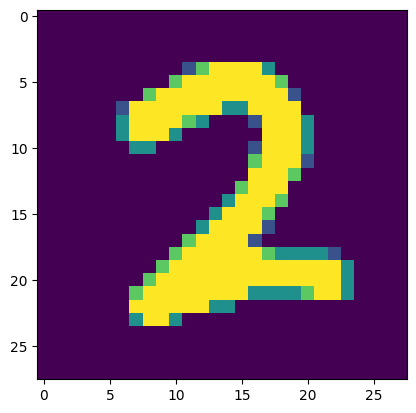

In [227]:
plt.imshow(data.x_train[0].reshape(28, 28))

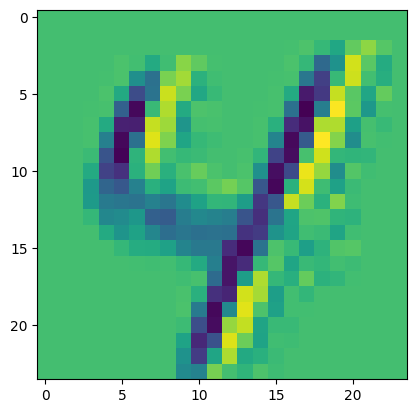

In [8]:
plt.imshow(arc.layout[0].output[1, 3])

In [144]:
arc.layout[0].W["data"][0, 0]

array([[-0.07581514, -0.01788062, -0.12350075,  0.03754671,  0.0169905 ],
       [-0.17040323, -0.14420417,  0.09091042, -0.00761174, -0.05232261],
       [ 0.29533529,  0.78976551,  1.50955162,  2.4197696 ,  0.0780152 ],
       [ 0.49497989,  1.61996955,  4.11461879,  6.68472197,  0.04017892],
       [-0.10112273, -0.04446973,  0.12539909,  0.00696695, -0.08097848]])

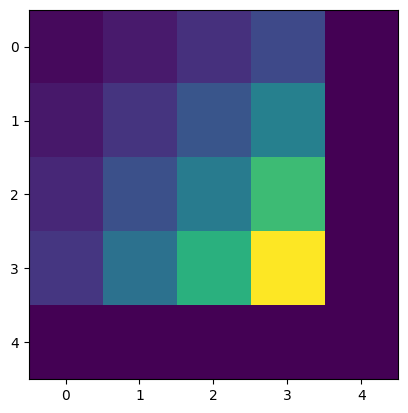

In [126]:
plt.imshow(arc.layout[0].W["data"][0, 0])

In [9]:
input = data.x_train.reshape(data.x_train.shape[0], 1, int(np.sqrt(data.x_train.shape[1])), int(np.sqrt(data.x_train.shape[1])))
kernel_size, Cin, Cout, factor = 5, 1, 6, 2
conv1 = Convolution2D(kernel_size, Cin, Cout)
relu1 = ReLU()
max1 = Maxpool(factor)
kernel_size, Cin, Cout = 5, 6, 16
conv2 = Convolution2D(kernel_size, Cin, Cout)
max2 = Maxpool(factor)
relu2 = ReLU()
flat = Flatten()
n_nodes, n_output, learning_rate = 256, 80, 0.1
fc1 = FC(n_nodes, n_output, learning_rate)
relu3 = ReLU()
n_nodes, n_output, learning_rate = 80, 10, 0.1
fc2 = FC(n_nodes, n_output, learning_rate)
soft = softmax()

In [10]:
c1 = conv1.forward_propogation(input)
r1 = relu1.forward_propogation(c1)
m1 = max1.forward_propogation(r1)
c2 = conv2.forward_propogation(m1)
r2 = relu2.forward_propogation(c2)
m2 = max2.forward_propogation(r2)
flt = flat.forward_propogation(m2)
f1 = fc1.forward_propogation(flt)
r3 = relu3.forward_propogation(f1)
f2 = fc2.forward_propogation(r3.T)
sft = soft.forward_propogation(f2)

In [11]:
actual = data.y_train_vector
sft_b = soft.backward_propogation(actual.T)
f2_b = fc2.backward_propogation(sft_b)
r3_b = relu3.backward_propogation(f2_b)
f1_b = fc1.backward_propogation(r3_b.T)
flt_b = flat.backward_propogation(f1_b)
m2_b = max2.backward_propogation(flt_b)
r2_b = relu2.backward_propogation(m2_b)
c2_b = conv2.backward_propogation(r2_b)
m1_b = max1.backward_propogation(c2_b)
r1_b = relu1.backward_propogation(m1_b)
c1_b = conv1.backward_propogation(r1_b)
c1_b.shape

(84, 80)
(84, 16, 8, 8)
(84, 6, 24, 24)


(84, 1, 28, 28)

In [149]:
conv1.W["data"].shape

(6, 1, 5, 5)

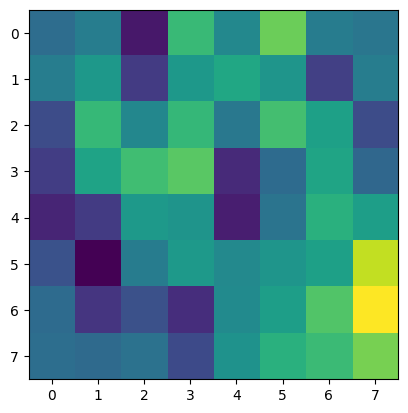

In [157]:
plt.imshow(conv2.output[4, 10])

In [ ]:
sum(np.isnan(f2))

array([0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
m2.shape

(21, 16, 4, 4)

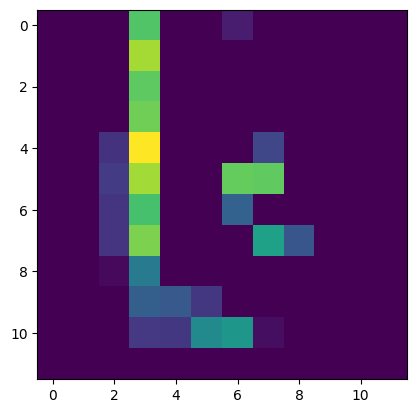

In [17]:
plt.imshow(m1[2, 4])

In [ ]:
F_0 = 5
Cin_0 = 1
Cout_0 = 6
Stride_0 = 1
Padding_0 = 0
W_0 = np.random.normal(0.0, np.sqrt(2/Cin_0), (Cout_0, Cin_0, F_0, F_0))
image = data.x_train[0:1, :]
N, H_0 = image.shape
H_0 = int(np.sqrt(H_0))
image = image.reshape((N, Cin_0, H_0, H_0))
nex_height = int((H_0 - F_0 + 2 * Padding_0)/ Stride_0) + 1 
Z_0 = np.zeros((N, Cout_0, nex_height, nex_height))
for i in range(Z_0.shape[2]):
    for j in range(Z_0.shape[3]):
        bKernel = np.zeros((N, Cout_0, Cin_0, H_0, H_0))
        if i + F_0 <= bKernel.shape[3] and j + F_0 <= bKernel.shape[4]:
            bKernel[:, :, :, i : (i + F_0), j : (j + F_0)] = W_0
            temp = (image[:, np.newaxis, :, :, :] * bKernel).sum((3, 4))
            Z_0[:, :, i, j] = temp.reshape(temp.shape[0], temp.shape[1])
print(Z_0.shape)
Z_0 = np.maximum(0, Z_0)
print(Z_0.shape)
Factor_0 = 2
temp = np.full((Z_0.shape[0], Z_0.shape[1], Z_0.shape[2] // Factor_0, Z_0.shape[3] // Factor_0), -float('inf'), dtype=Z_0.dtype)
np.maximum.at(temp, (np.arange(Z_0.shape[0])[:, None, None, None], np.arange(Z_0.shape[1])[:, None, None], np.arange(Z_0.shape[2])[:, None] // Factor_0, np.arange(Z_0.shape[3]) // Factor_0), Z_0)

F_1 = 5
Cin_1 = 6
Cout_1 = 16
Stride_1 = 1
Padding_1 = 0
W_1 = np.random.normal(0.0, np.sqrt(2/Cin_1), (Cout_1, Cin_1, F_1, F_1))
image = temp
N, Cin_1, H_1, _ = image.shape
nex_height = int((H_1 - F_1 + 2 * Padding_1)/ Stride_1) + 1 
Z_1 = np.zeros((N, Cout_1, nex_height, nex_height))
for i in range(Z_1.shape[2]):
    for j in range(Z_1.shape[3]):
        bKernel = np.zeros((N, Cout_1, Cin_1, H_1, H_1))
        if i + F_1 <= bKernel.shape[3] and j + F_1 <= bKernel.shape[4]:
            bKernel[:, :, :, i : (i + F_1), j : (j + F_1)] = W_1
            temp = (image[:, np.newaxis, :, :, :] * bKernel).sum((2, 3, 4))
            Z_1[:, :, i, j] = temp.reshape(temp.shape[0], temp.shape[1])
print(Z_1.shape)
Z_1 = np.maximum(0, Z_1)
print(Z_1.shape)
Factor_1 = 2
temp_0 = np.full((Z_1.shape[0], Z_1.shape[1], Z_1.shape[2] // Factor_1, Z_1.shape[3] // Factor_1), -float('inf'), dtype=Z_1.dtype)
np.maximum.at(temp_0, (np.arange(Z_1.shape[0])[:, None, None, None], np.arange(Z_1.shape[1])[:, None, None], np.arange(Z_1.shape[2])[:, None] // Factor_1, np.arange(Z_1.shape[3]) // Factor_1), Z_1)
print(temp_0.shape)
input = temp_0.reshape(-1)
input = input.reshape(1, input.shape[0])
print(input.shape[0])
net = DenseNetwork(3, [input.shape[1], 100, 10])
net.initialize_weights()
net.initialize_layers(input)
net.link_layers()
net.forward_feed()
out = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]).reshape(10, 1)
net.backward_feed(out)


In [ ]:
class Layer:
    class Bias:
        def __init__(self, n_nodes):
            self.data = np.random.normal(loc = 0.0, scale = 0.5, size = (n_nodes, 1)) / np.sqrt(n_nodes)
            self.delta = np.zeros((1))
            
        def update_data(self, alpha):
            self.data = self.data - alpha * self.delta
            if self.isNaN() > 0:
                print("Nan occured in updated bias")
                exit()
            self.reset_delta()
            
        def reset_delta(self):
#             m,  = self.delta.shape
            self.delta = np.zeros((1))
            
        def isNaN(self):
            return np.sum(np.isnan(self.data))
            
        def __str__(self):
            return f"Bias Data :{self.data}, \n Bias Delta: {self.delta}"
        
    def __init__(self, n_nodes, activation_function, input_weight=None, output_weight=None):
        self.bias = self.Bias(n_nodes)
        self.input_weight = input_weight
        self.output_weight = output_weight
        if activation_function == "softmax":
            self.activate_layer = self.activate_softmax
            self.deactivate_layer = self.deactivate_softmax
        else:
            self.activate_layer = self.activate_ReLU
            self.deactivate_layer = lambda actual : self.deactivate_ReLU(actual)
            
    def deactivate_softmax(self, actual):
        self.dZ = self.A - actual
        
    def deactivate_ReLU(self):
        self.dZ = self.output_weight.data.T.dot(self.output_layer.dZ) * Layer.deriv_ReLU(self.Z)
        
    def activate_softmax(self):
        self.A = Layer.softmax(self.Z)
        
    def activate_ReLU(self):
        self.A = Layer.ReLU(self.Z)
        
    def softmax(Z):
#         expZ = np.exp(Z - np.max(Z))
#         return expZ / np.sum(expZ, 0)
        return np.exp(Z)/np.sum(np.exp(Z), 0)

    def deriv_ReLU(Z):
        return Z > 0
    
    def ReLU(Z):
        return np.maximum(Z, 0)
        
    def set_input_layer(self, input_layer):
        if hasattr(self, 'input_weight'):
            self.input_layer = input_layer
    
    def set_output_layer(self, output_layer):
        if hasattr(self, 'output_weight'):
            self.output_layer = output_layer

    def forward_propogation(self):
        if hasattr(self, 'input_layer'):
            self.Z = self.input_weight.data.dot(self.input_layer.A) + self.bias.data
            self.activate_layer()
            
    def backward_propogation(self, actual):
        si = actual.size
        # if hasattr(self, 'input_layer'):
        if hasattr(self, 'output_layer'):
            self.deactivate_ReLU()
        else:
            self.deactivate_softmax(actual)
        self.input_weight.delta = self.dZ.dot(self.input_layer.A.T) / si
        self.bias.delta = np.sum(self.dZ) / si
            
    def update_parameters(self, alpha):
        if hasattr(self, 'input_layer'):
            self.input_weight.update_data(alpha)
            self.bias.update_data(alpha)


In [ ]:
class DenseNetwork:
    def __init__(self, n_layers, n_nodes_list):
        self.n_hidden = n_layers - 2
        self.weights

In [ ]:


class DenseNetwork:
    class Weight:
        def __init__(self, n_input, n_output):
            self.data = np.random.randn(n_output, n_input) / np.sqrt(n_input/2)
            # self.data = np.random.normal(loc = 0.0, scale = 0.5, size = (n_output, n_input)) / np.sqrt(n_input/2)
            self.delta = np.zeros((n_output, n_input))
            
        def reset_delta(self):
            m, n = self.delta.shape
            self.delta = np.zeros((m, n))

        def update_data(self, alpha):
            self.data = self.data - alpha * self.delta
            if self.isNaN() > 0:
                print("Nan occured in updated weight")
                exit()
            self.reset_delta()
        
        def isNaN(self):
            return np.sum(np.isnan(self.data))
        
        def __str__(self):
            return f"Weight Data :{self.data}, \n Weight Delta: {self.delta}"
        
    def __init__(self, n_layers, n_nodes_list):
        self.n_hidden = n_layers - 2
        self.weights_list = list()
        self.layers_list = list()
        self.n_nodes_list = n_nodes_list
        
    def initialize_weights(self):
        for i in range(self.n_hidden + 1):
            cur_nodes = self.n_nodes_list[i]
            nex_nodes = self.n_nodes_list[i + 1]
            self.weights_list.append(self.Weight(cur_nodes, nex_nodes))
            
    def initialize_layers(self, data):
        self.layers_list.append(Input_Layer(data, self.weights_list[0]))
        for j in range(1, 1 + self.n_hidden):
            self.layers_list.append(Layer(self.n_nodes_list[j], "ReLU", input_weight = self.weights_list[j - 1], output_weight = self.weights_list[j]))
        self.layers_list.append(Layer(self.n_nodes_list[-1], "softmax", input_weight = self.weights_list[-1]))
        
    def link_layers(self):
        self.layers_list[0].set_output_layer(self.layers_list[1])
        for k in range(1, 1 + self.n_hidden):
            self.layers_list[k].set_input_layer(self.layers_list[k -1])
            self.layers_list[k].set_output_layer(self.layers_list[k + 1])
        self.layers_list[-1].set_input_layer(self.layers_list[-2])
        
    def forward_feed(self):
        for b in self.layers_list:
            b.forward_propogation()
            
    def backward_feed(self, actual):
        for c in self.layers_list[::-1]:
            c.backward_propogation(actual)
            
    def update_network(self, alpha):
        for d in self.layers_list:
            d.update_parameters(alpha)

    def accuracy(act, pred):
        res = sum(argmax(pred, axis=0) == argmax(act, axis=0)) / pred.shape[1]
        return res
        
            
    def mean_squared_error(act, pred):
        diff = pred - act
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()
        return mean_diff
    
    def L_i_vectorized(act, pred):
        delta = 1.0
        margins = np.maximum(0, pred - pred[act==1] + delta)
        margins[act==1] = 0
        loss_i = np.sum(margins)
        return loss_i/pred.shape[1]

    def printStatement(self, act, iteration, epoch):
        output = self.layers_list[-1].A
        statement = "Loss :" + str(DenseNetwork.L_i_vectorized(act, output)) + "; MSE: " + str(DenseNetwork.mean_squared_error(act, output)) + "; Accuracy: " + str(DenseNetwork.accuracy(act, output)) + " " + str(iteration) + " / " + str(epoch)
        return statement

    def prediction(self, test_image):
        temp = self.layers_list[0].A
        self.layers_list[0].A = test_image
        self.forward_feed()
        output = argmax(self.layers_list[-1].A, axis=0)
        self.layers_list[0].A = temp
        print("I predict it as " + str(output))

class Layer:
    class Bias:
        def __init__(self, n_nodes):
            self.data = np.random.normal(loc = 0.0, scale = 0.5, size = (n_nodes, 1)) / np.sqrt(n_nodes)
            self.delta = np.zeros((1))
            
        def update_data(self, alpha):
            self.data = self.data - alpha * self.delta
            if self.isNaN() > 0:
                print("Nan occured in updated bias")
                exit()
            self.reset_delta()
            
        def reset_delta(self):
#             m,  = self.delta.shape
            self.delta = np.zeros((1))
            
        def isNaN(self):
            return np.sum(np.isnan(self.data))
            
        def __str__(self):
            return f"Bias Data :{self.data}, \n Bias Delta: {self.delta}"
        
    def __init__(self, n_nodes, activation_function, input_weight=None, output_weight=None):
        self.bias = self.Bias(n_nodes)
        self.input_weight = input_weight
        self.output_weight = output_weight
        if activation_function == "softmax":
            self.activate_layer = self.activate_softmax
            self.deactivate_layer = self.deactivate_softmax
        else:
            self.activate_layer = self.activate_ReLU
            self.deactivate_layer = lambda actual : self.deactivate_ReLU(actual)
            
    def deactivate_softmax(self, actual):
        self.dZ = self.A - actual
        
    def deactivate_ReLU(self):
        self.dZ = self.output_weight.data.T.dot(self.output_layer.dZ) * Layer.deriv_ReLU(self.Z)
        
    def activate_softmax(self):
        self.A = Layer.softmax(self.Z)
        
    def activate_ReLU(self):
        self.A = Layer.ReLU(self.Z)
        
    def softmax(Z):
#         expZ = np.exp(Z - np.max(Z))
#         return expZ / np.sum(expZ, 0)
        return np.exp(Z)/np.sum(np.exp(Z), 0)

    def deriv_ReLU(Z):
        return Z > 0
    
    def ReLU(Z):
        return np.maximum(Z, 0)
        
    def set_input_layer(self, input_layer):
        if hasattr(self, 'input_weight'):
            self.input_layer = input_layer
    
    def set_output_layer(self, output_layer):
        if hasattr(self, 'output_weight'):
            self.output_layer = output_layer

    def forward_propogation(self):
        if hasattr(self, 'input_layer'):
            self.Z = self.input_weight.data.dot(self.input_layer.A) + self.bias.data
            self.activate_layer()
            
    def backward_propogation(self, actual):
        si = actual.size
        # if hasattr(self, 'input_layer'):
        if hasattr(self, 'output_layer'):
            self.deactivate_ReLU()
        else:
            self.deactivate_softmax(actual)
        self.input_weight.delta = self.dZ.dot(self.input_layer.A.T) / si
        self.bias.delta = np.sum(self.dZ) / si
            
    def update_parameters(self, alpha):
        if hasattr(self, 'input_layer'):
            self.input_weight.update_data(alpha)
            self.bias.update_data(alpha)
            
class Input_Layer(Layer):
    def __init__(self, train_data, output_weight):
        self.Z = train_data.T/255.
        self.A = train_data.T/255.
        self.output_weight = output_weight



In [ ]:
def importData(data_name, train_percentage):
    data = Data(data_name)
    data.prepare_data(train_percentage)
    return data

data_name, train_percentage = "MNIST_dataset.csv", 0.4
data = importData(data_name, train_percentage)

